## Dynamics - Using Time 

COVID-19 in a real setting is a race against time. Understanding the probability of containment and outbreak helps us understand the dataset, however we need to use time to quantify the effects of seeding, compliance and testing. We have 3 recorded important dates:

+ First case - the first confirmed case of COVID 
+ Outbreak - found by the median of daily new cases and diagnosis (unsure of criteria)
+ Recurrence - similar to outbreak, but only if another outbreak occured

Using the mean and standard deviation from $1000$ simulations of each setting, we can try and understand how `iq_factor`, `cluster_size/poisson_lambda` and `num_tests` affect the simulation. If a value was not measured in the simulation (e.g. no outbreaks occured, or the few COVID infected people did not get tested), then that value does not contribute to the mean/std (i.e. there are no zeros). 


In [245]:
# Set-up: importing the data and loading packages
import scipy
import pandas as pd
import scipy
import numpy as np
import matplotlib
import matplotlib.patches as mpatches
# matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
# import covasim as cv
import math 
import csv
import sys


# Make the data more easily recognized - use names for the indices corresponding to each type of data

class DT: # DT = data type
    QLD_c = 0  # QLD cluster, i.e. instead of writing [0] use [DT.QLD_c] for ease of use
    UK_c  = 1  # UK cluster
    QLD_p = 2  # QLD poisson
    UK_p  = 3  # UK poisson

# Files we will use
fnames = ['outbreak_cluster_size_oz.csv','outbreak_cluster_size_uk.csv','outbreak_poisson_lambda_oz.csv','outbreak_poisson_lambda_uk.csv']

data = [0,0,0,0]
print('Begin import: ')
for ii in range(len(fnames)):
    print(fnames[ii] + ' ----  complete')
      
    # Reading data files with pandas
    data[ii] = pd.read_csv(sys.path[0]+ '/../' + fnames[ii])

# Data now works like this: if you want the cluster QLD value for iq_factor, write "data[DT.QLD_c]['iq_factor']" 


Begin import: 
outbreak_cluster_size_oz.csv ----  complete
outbreak_cluster_size_uk.csv ----  complete
outbreak_poisson_lambda_oz.csv ----  complete
outbreak_poisson_lambda_uk.csv ----  complete


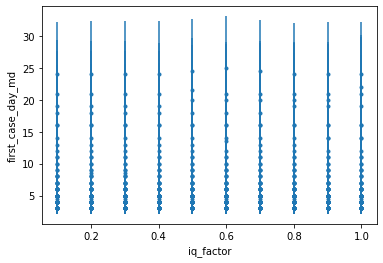

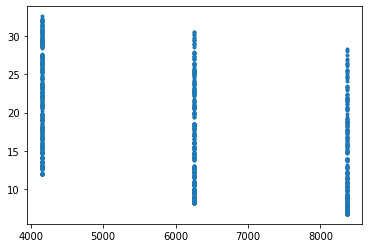

In [2]:
# Plotting significant days compared to COVID-19 response

# It is likely that comparing the trials with the same cluster/poisson will be important

# List of controlled simulation parameters:
x_var = ['num_tests','iq_factor']
initial_size = ['cluster_size','poisson_lambda']

# List of observed variables to use:
# y_var = ['first_case_day_av','outbread_day_av','resurgence_day_av']
y_var = ['first_case_day_md','outbread_day_md','resurgence_day_md']
y_std = ['first_case_day_sd','outbread_day_sd','resurgence_day_sd']

# Boolean for when when events occur - special case for ii = 0, all sims have it
id_bool = ['','outbreak','resurgence']


In [153]:
# Create violin plots for the number of tests used, and the iq_factor

# Find the unique values for each 


# Sort the data for each unique value into arrays
class_names = ['QLD_c','UK_c','QLD_p','UK_p']
Gdata_num_tests = {}
for jj in range(4):
    unique_num_tests = np.unique(data[jj]['num_tests'])
#     print(unique_num_tests)

    unique_iq_factor = np.unique(data[jj]['iq_factor'])
#     print(unique_iq_factor)

    # Number of tests
    # Data grouped by number of tests -- assumes that each unique element has the same number of trials
    id_this_val = np.where(data[jj]['num_tests'] == unique_num_tests[0])
    Gdata_num_tests[class_names[jj]] = np.zeros([np.size(unique_num_tests),int(np.size(id_this_val))]) 
    print(class_names[jj])
    
    for ii in range(np.size(unique_num_tests)):
        id_this_val = np.where(data[jj]['num_tests'] == unique_num_tests[ii]) # Find when it is equal to this value
        print(np.size(data[jj]['first_case_day_md'][id_this_val[0]]))
        Gdata_num_tests[class_names[jj]][ii,0:np.size(id_this_val)] = data[jj]['first_case_day_md'][id_this_val[0]]



# # iq_factor
# Gdata_iq_factor = np.zeros([4,np.size(unique_iq_factor),int(np.size(data[DT.QLD_c]['num_tests'])/np.size(unique_iq_factor)) ]) 
# for ii in range(np.size(unique_num_tests)):
#     id_num_tests[ii,:] = np.where(data[DT.QLD_c]['num_tests'] == unique_num_tests[ii]) 


QLD_c
500
500
500
UK_c
500
500
500
500
500
QLD_p
730
730
730
500
500
UK_p
730
730
730
730
730


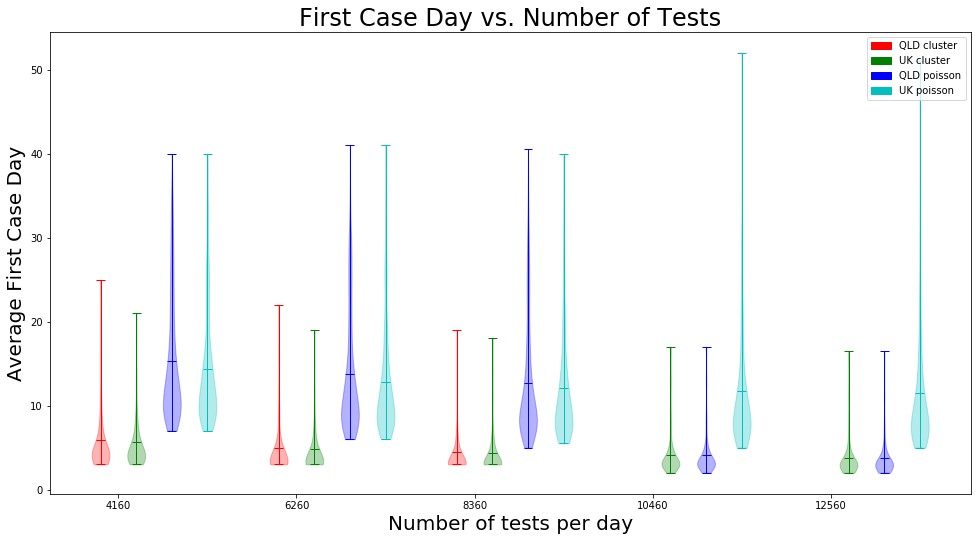

In [251]:
# Plot violin plot on axes 1
pos = np.array([0,5,10,15,20]) # Initial position of violins
fig = plt.figure()
fig.set_size_inches(16.5, 8.5)
# ax = fig.add_subplot(1, 1, 1)

# colours
col = ['r','g','b','c']
fake_p = [0,0,0,0]
for ii in range(4):
    Dataset = Gdata_num_tests[class_names[ii]][:,:]
    N_s = np.size(Dataset[:,1]) # Number of sizes
    Dataset[Dataset==0] = np.nan
        
    pos = pos + 1
    for jj in range(N_s):
        mask = ~np.isnan(Dataset[jj,:]) # Removing NaN but keeping structure  
        plot_Data = np.array(Dataset[jj,mask])
        vp = plt.violinplot(plot_Data.T,positions = [1+pos[jj]],showmeans = True)        
                
        for partname in ('cbars','cmins','cmaxes','cmeans'):
            v = vp[partname]
            v.set_edgecolor(col[ii])
            v.set_linewidth(1)
        
        for pc in vp['bodies']:
            pc.set_facecolor(col[ii])
            pc.set_edgecolor(col[ii])
            
        fake_p[ii] = mpatches.Patch(color=col[ii]) #using this for legend - violinplot has no label parameter :(
           
plt.legend([fake_p[0], fake_p[1], fake_p[2], fake_p[3]],['QLD cluster','UK cluster','QLD poisson','UK poisson'])
plt.title('First Case Day vs. Number of Tests',FontSize = 24)
plt.xlabel('Number of tests per day',FontSize = 20)
plt.ylabel('Average First Case Day',FontSize = 20)
plt.xticks(pos-1.5, unique_num_tests)
plt.savefig('Preliminary_FirstCaseDay_vs_NumTests_Figure.pdf')  

In [214]:
print(np.shape([Dataset[:,:]>0],dim=1))

TypeError: shape() got an unexpected keyword argument 'dim'